__Протащик Алеся__

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import date,timedelta

In [2]:
df = pd.read_excel('data_for_rfm.xlsx')

In [3]:
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))

In [116]:
df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [20]:
df_1 = df.fillna(0)

In [21]:
df_1 = df_1.query('quantity>0')

In [35]:
df_1 = df_1.query('sales>0')

<AxesSubplot:>

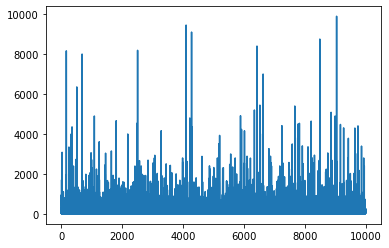

In [67]:
df_1.sales.plot()

In [42]:
#создадим столбец с ценой
df['price'] = df.sales/df.quantity

In [141]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,price
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


In [68]:
df_1['total_sum'] = df.quantity*df.price

__ABC XYZ начинается с АВС-анализа. Мы изучаем количество заказов в интернет-магазине.__

По методу Парето делим все заказы на 3 группы:

__А — лидеры.__ Это 20% заказов, которые генерируют 80% прибыли.

__B — середняки.__ Это 30% заказов. Они приносят 15% прибыли.

__C — отстающие.__ Оставшиеся 50% заказов, которые дают 5% прибыли.

In [69]:
df_abc = df_1.groupby('customer_id', as_index = False).agg({'total_sum': 'sum'}).sort_values('total_sum', ascending = False)

In [70]:
df_abc.head()

,customer_id,total_sum
6,AB-10105,14473.571
434,KL-16645,14175.229
669,SC-20095,14142.334
683,SE-20110,12209.438
131,CC-12370,12129.072


In [71]:
total_sum = df_abc.total_sum.sum()
total_sum

2221362.5323

In [72]:
df_abc['share_of_total']=df_abc.total_sum/total_sum*100

In [73]:
#посчитаем кумулятивную сумму заказов
df_abc['cum_sum']=df_abc.share_of_total.cumsum()

In [74]:
#отмеряем на уровне 80%, 95%, 5%
df_abc['abc'] = np.where(df_abc['cum_sum']<80, 'A', np.where((df_abc['cum_sum']<95), 'B', 'C'))

In [75]:
df_abc

,customer_id,total_sum,share_of_total,cum_sum,abc
6,AB-10105,14473.571,0.651563,0.651563,A
434,KL-16645,14175.229,0.638132,1.289695,A
669,SC-20095,14142.334,0.636651,1.926346,A
683,SE-20110,12209.438,0.549637,2.475984,A
131,CC-12370,12129.072,0.546019,3.022003,A
...,...,...,...,...,...
659,RS-19870,22.328,0.001005,99.998046,C
508,MG-18205,16.739,0.000754,99.998800,C
145,CJ-11875,16.520,0.000744,99.999544,C
456,LD-16855,5.304,0.000239,99.999782,C


In [150]:
df_abc.query('abc == "A"')

,customer_id,total_sum,share_of_total,cum_sum,abc
6,AB-10105,14473.571,0.651563,0.651563,A
434,KL-16645,14175.229,0.638132,1.289695,A
669,SC-20095,14142.334,0.636651,1.926346,A
683,SE-20110,12209.438,0.549637,2.475984,A
131,CC-12370,12129.072,0.546019,3.022003,A
...,...,...,...,...,...
425,KD-16615,2243.510,0.100997,79.560462,A
766,TS-21505,2243.274,0.100986,79.661448,A
366,JG-15310,2240.580,0.100865,79.762313,A
478,LW-16825,2238.061,0.100752,79.863065,A


In [151]:
401/793

0.5056746532156369

- группа А (50,56%) — самые ходовые и прибыльные заказы. Товары из заказов нужно закупать и рекламировать в первую очередь, их дефицит приведёт к уменьшению выручки.

In [152]:
df_abc.query('abc == "B"')

,customer_id,total_sum,share_of_total,cum_sum,abc
297,GG-14650,2224.0000,0.100119,80.063848,B
555,NC-18415,2218.9900,0.099893,80.163741,B
493,MC-18100,2218.9800,0.099893,80.263634,B
230,DP-13105,2215.0020,0.099714,80.363348,B
590,PF-19225,2206.1280,0.099314,80.462662,B
...,...,...,...,...,...
724,SW-20245,1085.0780,0.048847,94.760851,B
362,JF-15490,1082.9180,0.048750,94.809601,B
194,DB-13360,1081.4660,0.048685,94.858286,B
239,DW-13195,1080.7510,0.048653,94.906938,B


In [154]:
206/793

0.2597730138713745

- группа В (25,97%) — эти заказы генерируют небольшую прибыль. Потенциально можно увеличить выручку, если усилить рекламу продуктов, которые были заказаны, изменить стоимость, продумать предложения по апсейлу и кросс-сейлу с их использованием.

In [155]:
df_abc.query('abc == "C"')

,customer_id,total_sum,share_of_total,cum_sum,abc
587,PC-19000,1061.488,0.047785,95.003218,C
231,DP-13165,1058.616,0.047656,95.050874,C
345,JC-15385,1058.108,0.047633,95.098507,C
605,PO-19195,1056.858,0.047577,95.146084,C
1,AA-10375,1056.390,0.047556,95.193640,C
...,...,...,...,...,...
659,RS-19870,22.328,0.001005,99.998046,C
508,MG-18205,16.739,0.000754,99.998800,C
145,CJ-11875,16.520,0.000744,99.999544,C
456,LD-16855,5.304,0.000239,99.999782,C


In [156]:
186/793

0.23455233291298866

- группа С (23,45%) — заказы, которые почти не приносят прибыли. Возможно, не стоит тратить рекламный бюджет на заказы из данной категории и держать излишек на складе.

__С помощью XYZ анализа посчитаем стабильность спроса на разные товары.__

In [76]:
df_xyz = df_1.groupby('customer_id', as_index = False).agg({'quantity': 'count'}).sort_values('quantity', ascending = False)

In [77]:
df_xyz

,customer_id,quantity
787,WB-21850,37
387,JL-15835,34
482,MA-17560,34
606,PP-18955,34
720,SV-20365,32
...,...,...
42,AO-10810,1
403,JR-15700,1
145,CJ-11875,1
637,RE-19405,1


Определяем группу для каждого товара:

X — стабильный спрос;
Y — спрос с колебаниями;
Z — случайный спрос.

In [78]:
#разделим совокупность заказов на 3 части и выявим границы, по которым присвоим X, Y, Z
df_xyz.describe([0.33, 0.66, 0.99])[["quantity"]].T

,count,mean,std,min,33%,50%,66%,99%,max
quantity,793.0,12.596469,6.242457,1.0,9.0,12.0,14.0,31.08,37.0


In [84]:
df_xyz['xyz'] = np.where(df_xyz['quantity']<9.0, 'Z', np.where((df_xyz['quantity']<14.0), 'Y', 'X'))

In [85]:
df_xyz

,customer_id,quantity,xyz
787,WB-21850,37,X
387,JL-15835,34,X
482,MA-17560,34,X
606,PP-18955,34,X
720,SV-20365,32,X
...,...,...,...
42,AO-10810,1,Z
403,JR-15700,1,Z
145,CJ-11875,1,Z
637,RE-19405,1,Z


In [145]:
df_xyz.query("xyz == 'Y'")

,customer_id,quantity,xyz
751,TH-21235,13,Y
78,BF-10975,13,Y
401,JP-16135,13,Y
425,KD-16615,13,Y
163,CM-12715,13,Y
...,...,...,...
313,GW-14605,9,Y
416,KB-16405,9,Y
437,KM-16660,9,Y
557,NC-18625,9,Y


In [146]:
264/793

0.3329129886506936

In [86]:
#соединяем результаты ABC и XYZ анализов и сопоставляем данные
df_total = df_abc.merge(df_xyz, on ='customer_id')

In [87]:
df_total

,customer_id,total_sum,share_of_total,cum_sum,abc,quantity,xyz
0,AB-10105,14473.571,0.651563,0.651563,A,20,X
1,KL-16645,14175.229,0.638132,1.289695,A,29,X
2,SC-20095,14142.334,0.636651,1.926346,A,22,X
3,SE-20110,12209.438,0.549637,2.475984,A,19,X
4,CC-12370,12129.072,0.546019,3.022003,A,11,Y
...,...,...,...,...,...,...,...
788,RS-19870,22.328,0.001005,99.998046,C,3,Z
789,MG-18205,16.739,0.000754,99.998800,C,2,Z
790,CJ-11875,16.520,0.000744,99.999544,C,1,Z
791,LD-16855,5.304,0.000239,99.999782,C,1,Z


In [88]:
#сделаем таблицу сопряженности
pd.crosstab(df_total.abc, df_total.xyz)

xyz,X,Y,Z
abc,,,
A,255,116,30
B,49,98,59
C,8,50,128


In [59]:
255+49+8+116

428

In [60]:
428/793

0.5397225725094578

In [63]:
128/793

0.1614123581336696

In [61]:
98+59+50

207

In [62]:
207/793

0.2610340479192938

In [64]:
30/793

0.03783102143757881

In [65]:
0.5397225725094578+0.1614123581336696+0.2610340479192938+0.03783102143757881

1.0

В результате анализа получили матрицу ABC XYZ — таблицу из 9 категорий товаров, отранжированные в 4 группы в зависимости от количества заказов и стабильности спроса.

По каждой группе можно предложить свою тактику продвижения и продаж.

In [164]:
print('зеленая группа', round((((255+49+8+116)/793)*100), 2),'%')
print('желтая группа', round(((30/793)*100), 2),'%')
print('серая группа', round((((98+50+59)/793)*100), 2),'%')
print('красная группа', round(((128/793)*100), 2),'%')

зеленая группа 53.97 %
желтая группа 3.78 %
серая группа 26.1 %
красная группа 16.14 %


- Зелёная группа — самые прибыльные товары, стоит сосредоточить усилия на их продвижении и продажах.

- Жёлтая группа — категории требуют дополнительного анализа: нужно понять, почему спрос на эти товары нестабильный.

- Серая группа — не отказываемся от этих товаров, но тратим минимум усилий.

- Красная группа — инвестировать время и силы в эти товары невыгодно.

# __RFM анализ__

Recency - количество дней с даты последней покупки

Frequency - количество покупок

Monetary - сумма купленных товаров

In [157]:
df_1.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,price,total_sum
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,261.9600
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,731.9400
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,14.6200
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,957.5775
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,22.3680


In [101]:
last_date = df_1['order_date'].max()
rfmTable = df_1.reset_index().groupby('customer_id').agg({'order_date': lambda x: (last_date - x.max()).days,
                                                 'row_id': lambda x: len(x), 
                                                 'total_sum': lambda x: x.sum()})
rfmTable.rename(columns={'order_date': 'recency', 
                          'row_id': 'frequency', 
                          'total_sum': 'monetary'}, inplace=True)

In [102]:
rfmTable

,recency,frequency,monetary
customer_id,,,
AA-10315,184,11,5563.560
AA-10375,19,15,1056.390
AA-10480,259,12,1790.512
AA-10645,55,18,5086.935
AB-10015,415,6,886.156
...,...,...,...
XP-21865,43,28,2374.658
YC-21895,4,8,5454.350
YS-21880,9,12,6720.444


In [103]:
#рассчитаем границы, по которым будем присваивать пользователю по даннному показателю 1-2-3-4
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,30.0,8.0,1137.616
0.50,76.0,12.0,2243.510
0.75,183.0,16.0,3729.793


In [104]:
quantiles.to_dict()

{'recency': {0.25: 30.0, 0.5: 76.0, 0.75: 183.0},
 'frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'monetary': {0.25: 1137.616,
  0.5: 2243.5099999999998,
  0.75: 3729.7929999999997}}

In [105]:
#присвоим значения для давности и частоты сделок (4 - минимальное значение, recency <= 30)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary, frequency, d = quartiles dict)
# 4 - максимальное значение, frequency >= 16, monetary >  3729.793
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [106]:
rfm_segmentation = rfmTable
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [107]:
rfm_segmentation

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
AA-10315,184,11,5563.560,1,2,4
AA-10375,19,15,1056.390,4,3,1
AA-10480,259,12,1790.512,1,2,2
AA-10645,55,18,5086.935,3,4,4
AB-10015,415,6,886.156,1,1,1
...,...,...,...,...,...,...
XP-21865,43,28,2374.658,3,4,3
YC-21895,4,8,5454.350,4,1,4
YS-21880,9,12,6720.444,4,2,4


In [108]:
#объединим цифры чтобы получились группы, в которые попал клиент
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,,,,,,,
AA-10315,184,11,5563.560,1,2,4,124
AA-10375,19,15,1056.390,4,3,1,431
AA-10480,259,12,1790.512,1,2,2,122
AA-10645,55,18,5086.935,3,4,4,344
AB-10015,415,6,886.156,1,1,1,111


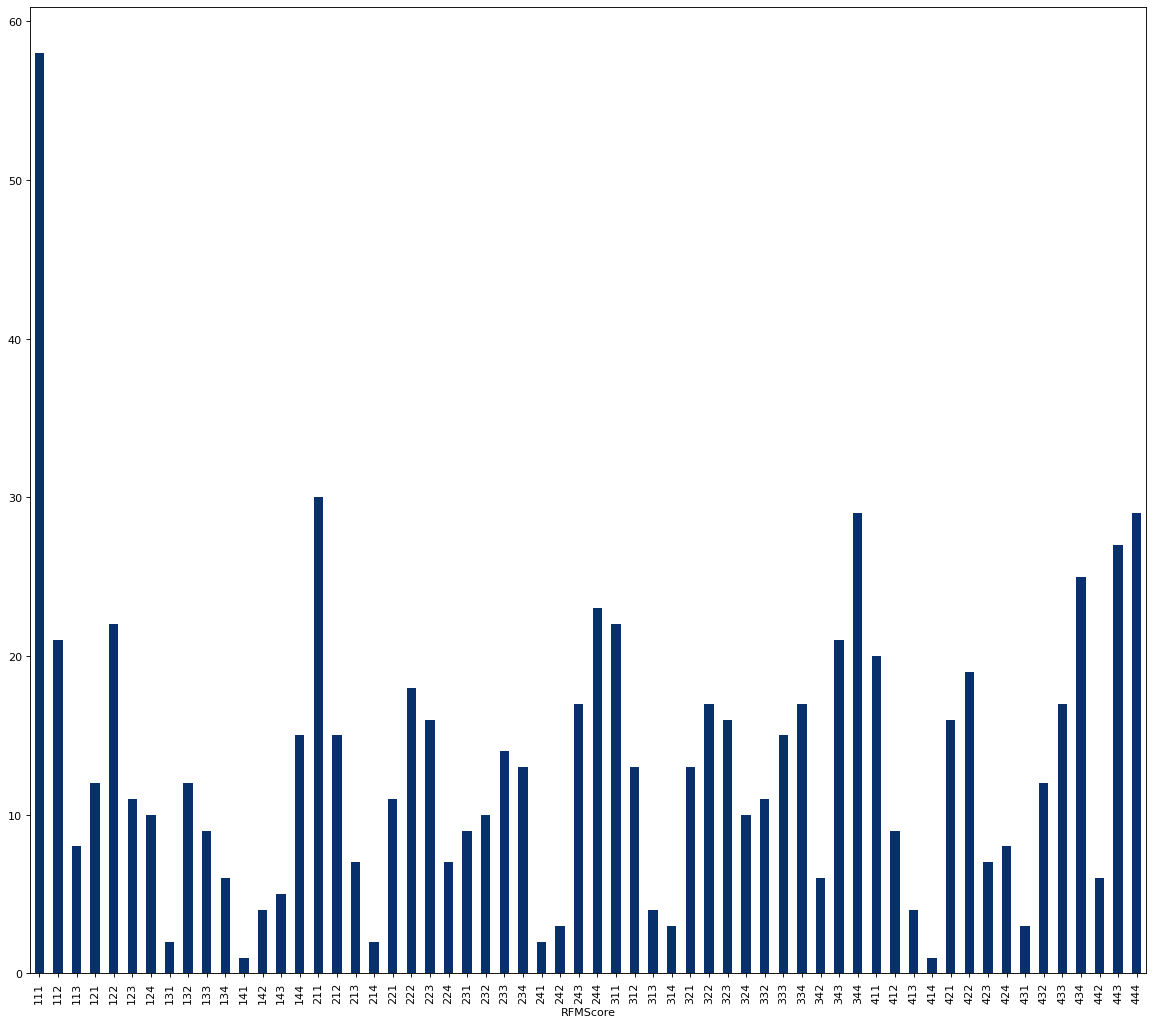

In [111]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
rfm_segmentation.groupby('RFMScore').agg('recency').count().plot(kind='bar', colormap='Blues_r')
plt.show()

- Группа 444 достаточно большая по сравнению с остальными группами, можем также заметить, что интересующие нас клиенты (411-444) представлены довольно значительными группами.


- Также можем наглядно убедиться, что группа 111 представлена довольно большим показателем (58).


In [166]:
#количество пользователей
rfm_segmentation.groupby('RFMScore').agg({'monetary': 'count'}).reset_index()

,RFMScore,monetary
0,111,58
1,112,21
2,113,8
3,121,12
4,122,22
5,123,11
6,124,10
7,131,2
8,132,12
9,133,9


In [165]:
#количество пользователей с большой суммой покупок
rfm_segmentation.query('M_Quartile == 4').groupby('RFMScore').agg({'monetary': 'count'}).reset_index()

,RFMScore,monetary
0,124,10
1,134,6
2,144,15
3,214,2
4,224,7
5,234,13
6,244,23
7,314,3
8,324,10
9,334,17


In [163]:
print("Лучшие клиенты: ", len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print("Лояльные клиенты: ", len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Клиенты с большими покупками: ", len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print("Средние по давности клиенты, но с большими покупками: ", len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print("Потерянные клиенты: ", len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print("Потерянные клиенты с дешевыми покупками: ", len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Лучшие клиенты:  29
Лояльные клиенты:  188
Клиенты с большими покупками:  198
Средние по давности клиенты, но с большими покупками:  23
Потерянные клиенты:  15
Потерянные клиенты с дешевыми покупками:  58


# __Кластерный анализ__

In [113]:
#установим необходимые либы
!pip install kneed

In [4]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator

In [117]:
df_new = df.copy()
df_new.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [540]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_date       9994 non-null   datetime64[ns]
 4   ship_mode       9994 non-null   object        
 5   customer_id     9994 non-null   object        
 6   customer_name   9994 non-null   object        
 7   segment         9994 non-null   object        
 8   country_region  9994 non-null   object        
 9   city            9994 non-null   object        
 10  state           9994 non-null   object        
 11  postal_code     9983 non-null   float64       
 12  region          9994 non-null   object        
 13  product_id      9994 non-null   object        
 14  category        9994 non-null   object        
 15  sub_

In [469]:
#выбираем интересующие нас качественные показатели
cols = ["city", "state", "category", "sub_category", "sales"]

In [470]:
data=df_new[cols]
data.head(3)

,city,state,category,sub_category,sales
0,Henderson,Kentucky,Furniture,Bookcases,261.96
1,Henderson,Kentucky,Furniture,Chairs,731.94
2,Los Angeles,California,Office Supplies,Labels,14.62


In [471]:
#переводим категориальные переменные в числовые переменные
data_adj = data.copy()
data_adj.head(5)

,city,state,category,sub_category,sales
0,Henderson,Kentucky,Furniture,Bookcases,261.9600
1,Henderson,Kentucky,Furniture,Chairs,731.9400
2,Los Angeles,California,Office Supplies,Labels,14.6200
3,Fort Lauderdale,Florida,Furniture,Tables,957.5775
4,Fort Lauderdale,Florida,Office Supplies,Storage,22.3680


In [472]:
cat_col = ["city", "state", "category", "sub_category"]

In [473]:
#трансформируем данные в ранжированнные
for col in cat_col:
    labelencoder = LabelEncoder()
    data_adj[col] = labelencoder.fit_transform(data_adj[col])

In [474]:
data_adj.head(7)

,city,state,category,sub_category,sales
0,194,15,0,4,261.9600
1,194,15,0,5,731.9400
2,266,3,1,10,14.6200
3,153,8,0,16,957.5775
4,153,8,1,14,22.3680
5,266,3,0,9,48.8600
6,266,3,1,2,7.2800


In [475]:
#стандартизируем данные
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_adj)
scaled_data = pd.DataFrame(scaled_data, columns=data_adj.columns)

In [476]:
scaled_data

,city,state,category,sub_category,sales
0,-0.617727,-0.473638,-1.544978,-0.710815,0.051510
1,-0.617727,-0.473638,-1.544978,-0.512842,0.805633
2,-0.100303,-1.247640,0.043552,0.477027,-0.345368
3,-0.912371,-0.925139,-1.544978,1.664869,1.167688
4,-0.912371,-0.925139,0.043552,1.268921,-0.332935
...,...,...,...,...,...
9989,0.108104,-0.925139,-1.544978,0.279053,-0.328314
9990,-1.264507,-1.247640,-1.544978,0.279053,-0.221269
9991,-1.264507,-1.247640,1.632082,1.070948,0.046080
9992,-1.264507,-1.247640,0.043552,0.872974,-0.321331


In [477]:
#передаем данные в array
X = scaled_data.values

In [478]:
X

array([[-0.6177269 , -0.47363803, -1.54497781, -0.71081548,  0.0515104 ],
       [-0.6177269 , -0.47363803, -1.54497781, -0.51284179,  0.80563348],
       [-0.10030313, -1.24764007,  0.04355184,  0.47702666, -0.34536777],
       ...,
       [-1.2645066 , -1.24764007,  1.6320815 ,  1.07094773,  0.04608048],
       [-1.2645066 , -1.24764007,  0.04355184,  0.87297404, -0.32133108],
       [ 1.70349361, -1.24764007,  0.04355184, -1.30473655,  0.02134419]])

__Выбор K__

Метод локтя будет использоваться при выборе числа K кластера для нашей сегментации клиентов.

In [479]:
#сумма квадратов расстояний
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

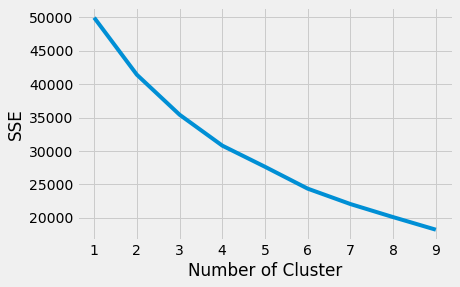

In [480]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [481]:
#количество кластеров с наименьшей ошибкой
K1 = KneeLocator(np.arange(1, 10, 1), sse, curve="convex", direction="decreasing")
K1.elbow

4

__Кластеризация__

- max_iterint, по умолчанию = 300 Максимальное количество итераций алгоритма k-средних за один прогон.


- random_state - Определяет генерацию случайных чисел для инициализации центроида.

In [482]:
#разбиваем совокупность данных на 4 кластера
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=10)

In [483]:
cluster = kmeans.labels_
cluster

array([1, 1, 2, ..., 2, 2, 0])

In [484]:
data_adj['cluster'] = cluster

In [485]:
data_adj.head()

,city,state,category,sub_category,sales,cluster
0,194,15,0,4,261.9600,1
1,194,15,0,5,731.9400,1
2,266,3,1,10,14.6200,2
3,153,8,0,16,957.5775,1
4,153,8,1,14,22.3680,2


In [486]:
#размер кластеров
data_adj.groupby('cluster').size()

cluster
0    3843
1    2098
2    3943
3     110
dtype: int64

Получили разнонаполненные данные, попробуем уменьшить количество кластеров до 3.

In [487]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=10)

In [488]:
cluster = kmeans.labels_
cluster

array([1, 1, 2, ..., 2, 2, 0])

In [489]:
data_adj['cluster'] = cluster

In [490]:
data_adj.head()

,city,state,category,sub_category,sales,cluster
0,194,15,0,4,261.9600,1
1,194,15,0,5,731.9400,1
2,266,3,1,10,14.6200,2
3,153,8,0,16,957.5775,1
4,153,8,1,14,22.3680,2


In [491]:
#размер кластеров
data_adj.groupby('cluster').size()

cluster
0    3848
1    2153
2    3993
dtype: int64

In [492]:
#средние значения по каждому кластеру
means = data_adj.groupby('cluster').mean()

In [493]:
means

,city,state,category,sub_category,sales
cluster,,,,,
0,281.263773,22.453742,1.214397,2.249740,128.770120
1,277.398514,22.188574,0.019508,8.331166,447.246602
2,280.077886,22.320060,1.253444,12.337841,210.060483


In [494]:
#координаты центров кластеров
kmeans.cluster_centers_

array([[ 9.38907841e-03,  7.12960888e-03,  3.84127979e-01,
        -1.05732088e+00, -1.62204146e-01],
       [-1.83883830e-02, -9.97378005e-03, -1.51398931e+00,
         1.46641397e-01,  3.48818591e-01],
       [ 8.66770588e-04, -1.49290922e-03,  4.46154402e-01,
         9.39857710e-01, -3.17668101e-02]])

- Данные из выделенных групп получились слишком незначительными.

__Полученные данные не являются определяющими для этих кластеров, выберем другие показатели для построения кластерного анализа__

In [96]:
#выбираем другие интересующие нас качественные показатели
cols_new = ["city", "sub_category", "quantity"]

In [97]:
data_new =df_new[cols_new]
data_new.head(3)

,city,sub_category,quantity
0,Henderson,Bookcases,2
1,Henderson,Chairs,3
2,Los Angeles,Labels,2


In [98]:
#переводим категориальные переменные в числовые переменные
data_adj_new = data_new.copy()
data_adj_new.head(5)

,city,sub_category,quantity
0,Henderson,Bookcases,2
1,Henderson,Chairs,3
2,Los Angeles,Labels,2
3,Fort Lauderdale,Tables,5
4,Fort Lauderdale,Storage,2


In [99]:
cat_col_1 = ["city", "sub_category"]

In [100]:
#трансформируем данные в ранжированнные
for col in cat_col_1:
    labelencoder = LabelEncoder()
    data_adj_new[col] = labelencoder.fit_transform(data_adj_new[col])

In [101]:
#стандартизируем данные
scaler_1 = StandardScaler()
scaled_data_1 = scaler_1.fit_transform(data_adj_new)
scaled_data_1 = pd.DataFrame(scaled_data_1, columns=data_adj_new.columns)

In [102]:
scaled_data_1

,city,sub_category,quantity
0,-0.617727,-0.710815,-0.804303
1,-0.617727,-0.512842,-0.354865
2,-0.100303,0.477027,-0.804303
3,-0.912371,1.664869,0.544012
4,-0.912371,1.268921,-0.804303
...,...,...,...
9989,0.108104,0.279053,-0.354865
9990,-1.264507,0.279053,-0.804303
9991,-1.264507,1.070948,-0.804303
9992,-1.264507,0.872974,0.094574


In [103]:
#передаем данные в array
X_1 = scaled_data_1.values
X_1

array([[-0.6177269 , -0.71081548, -0.8043034 ],
       [-0.6177269 , -0.51284179, -0.35486486],
       [-0.10030313,  0.47702666, -0.8043034 ],
       ...,
       [-1.2645066 ,  1.07094773, -0.8043034 ],
       [-1.2645066 ,  0.87297404,  0.09457367],
       [ 1.70349361, -1.30473655, -0.8043034 ]])

In [104]:
#сумма квадратов расстояний
sse_new = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(X_1)
    sse_new.append(kmeans.inertia_)

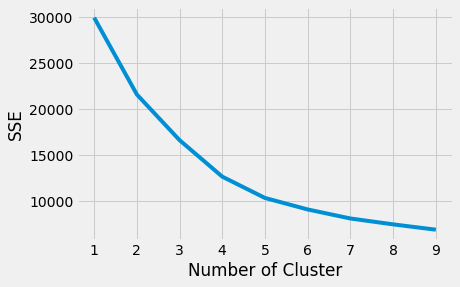

In [105]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse_new)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [106]:
#количество кластеров с наименьшей ошибкой
K1 = KneeLocator(np.arange(1, 10, 1), sse_new, curve="convex", direction="decreasing")
K1.elbow

4

In [107]:
#разбиваем совокупность данных на 4 кластера
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data_1)

KMeans(n_clusters=4, random_state=10)

In [108]:
cluster_1 = kmeans.labels_
cluster_1

array([1, 1, 0, ..., 1, 1, 3])

In [109]:
data_adj_new['cluster'] = cluster_1

In [110]:
#размер кластеров
data_adj_new.groupby('cluster').size()

cluster
0    3134
1    2526
2    1501
3    2833
dtype: int64

In [111]:
#средние значения по каждому кластеру
means = data_adj_new.groupby('cluster').mean()

In [112]:
means

,city,sub_category,quantity
cluster,,,
0,355.788130,12.205488,3.041800
1,100.590657,7.651623,3.130641
2,282.119254,7.385743,7.864091
3,354.853512,2.539005,3.045535


In [113]:
#координаты центров кластеров
kmeans.cluster_centers_

array([[ 0.54495399,  0.91365529, -0.33607851],
       [-1.28990991,  0.01341341, -0.29605649],
       [ 0.0148426 , -0.04084193,  1.83068709],
       [ 0.5370146 , -0.99995759, -0.33489686]])

In [114]:
#подставим новые значения чтобы посмотреть к какой кластерной группе отнести пользователя
new_items = [[-2.03656544,  1.05995565, -0.59767834], [0.02229482, -0.04093212, 1.82003401]]

In [115]:
kmeans.predict(new_items)

array([1, 2])

- Новых пользователей можно отнести к кластерной группе №2 и №3.